### This problem is from "An Introduction to Computational Fluid Dynamics" by Veersteg and Malalasekera 

#### Chapter 4: Finite Volume Methods for Diffusion Problems, Example 4.1 

Consider the problem of source-free heat conduction in an insulated rod whose ends are maintained at constant temperatures of 100°C and 500°C respectively. The one dimensional problem is governed by 

$$ \frac{d}{dx} \left(k\frac{dT}{dx}\right)  = 0$$

Calculate the steady state temperature distribution in the rod. Thermal conductivity k equals 1000 W/m.K, cross-sectional area A is $10 × 10^{−3} m^2$.

![title](rod.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Initializing the variables

x = 0.5
nx = 5
start = 0.05   # The finite volume nodes do not coincide with the boundary nodes
xarr = np.linspace(start, x-start, nx)
dx = x/nx
print(xarr, dx)

k = 1000
A = 10E-3

Ta = 100
Tb = 500

[0.05 0.15 0.25 0.35 0.45] 0.1


The array of finite volume nodes do not coincide with the boundary nodes. 

Therefore, the geometry is as follows:

![title](rod_grid.png)

In [11]:
# Initializing the temperature array of the rod

T = np.zeros(nx)
print(T)

[0. 0. 0. 0. 0.]


### Discretization of interior nodes (2, 3, 4)

$$ \left( \frac{kA}{\delta x} + \frac{kA}{\delta x} \right) T_P = \left( \frac{kA}{\delta x} \right)T_E + \left( \frac{kA}{\delta x} \right)T_W $$

### Discretization of node 1 ($T_W$ = 0)

$$ \left( \frac{kA}{\delta x} + \frac{2kA}{\delta x} \right) T_P = \left( \frac{kA}{\delta x} \right)T_E + \left( \frac{2kA}{\delta x} \right)T_a $$

Here, the $T_a$ term acts as the source term $S_u$, thereby giving $S_p$ as $-\frac{2kA}{\delta x}$.

### Discretization of node 5 ($T_E$ = 0)

$$ \left( \frac{kA}{\delta x} + \frac{2kA}{\delta x} \right) T_P = \left( \frac{kA}{\delta x} \right)T_W + \left( \frac{2kA}{\delta x} \right)T_b $$

Here, the $T_b$ term acts as the source term $S_u$, thereby giving $S_p$ as $-\frac{2kA}{\delta x}$.

Evaluating numerically, we get:
$$ \frac{kA}{\delta x} = 100 $$

In [12]:
# Initializing the TDMA matrices

#Lower diagonal matrix
a = [-100]*4

# Diagonal matrix
b = [300] + [200]*3 + [300]

# Upper diagonal matrix
c = [-100]*4

#RHS Matrix
d = [200*Ta, 0, 0, 0, 200*Tb]

print(a, b, c, d)

[-100, -100, -100, -100] [300, 200, 200, 200, 300] [-100, -100, -100, -100] [20000, 0, 0, 0, 100000]


In [13]:
# TDMA Algorithm

def TDMAAlgo(a,b,c,d):
    n = len(d)
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

In [15]:
# Getting the answer

T_comp = TDMAAlgo(a, b, c, d)
print(T_comp)

[140. 220. 300. 380. 460.]


[0, 0.05, 0.15000000000000002, 0.25, 0.35000000000000003, 0.45, 0.5]


Text(0.5, 1.0, 'Temperature distribution in the rod')

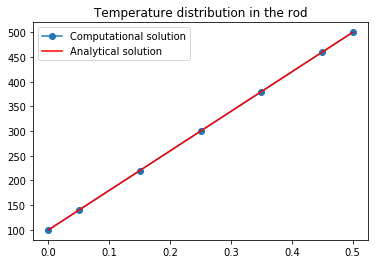

In [23]:
# Plotting the computational solution
x_plot = [0] + list(xarr) + [0.5]
T_plot = [Ta] + list(T_comp) + [Tb]
plt.plot(x_plot, T_plot, marker = 'o', label = "Computational solution")

print(x_plot)
#Plotting the exact solution
anal_sol=[]
for i in range(len(x_plot)):
    anal_sol.append(800*x_plot[i] + 100)
plt.plot(x_plot, anal_sol, color='red', label="Analytical solution")
plt.legend()
plt.title("Temperature distribution in the rod")